In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [24]:
faithful = pd.read_csv('faithful.csv')
X=faithful.iloc[:, 1:3]
print(X.describe())
print(type(X))
print((X))
print("X.columns \n",X.columns)
y=faithful.iloc[:,1]
y= y.values
y=y.astype(int)
y=np.where(y==5, 4, y)
print("X.values are \n",(X.values),"\n type(y) \n",type(y),"\n (y) \n",(y))
X=X.values
print(type(X))
print(X)

        eruptions     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000
<class 'pandas.core.frame.DataFrame'>
     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]
X.columns 
 Index(['eruptions', 'waiting'], dtype='object')
X.values are 
 [[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]
 [ 2.883 55.   ]
 [ 4.7   88.   ]
 [ 3.6   85.   ]
 [ 1.95  51.   ]
 [ 4.35  85.   ]
 [ 1.833 54.   ]
 [ 3.917 84.   ]
 [ 4.2   78.   ]
 [ 1.75  47.   ]
 [ 4.7   83.   ]
 [ 2.167 52.   ]
 [ 1.75  62.   ]
 [ 4.8   84.   ]

In [25]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [26]:
pca = PCA(1)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)


Shape of X: (272, 2)
Shape of transformed X: (272, 1)


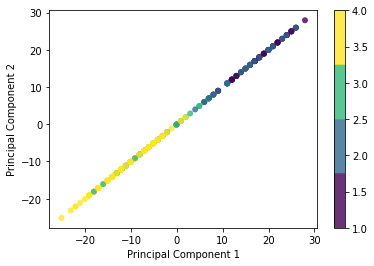

In [33]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 0]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 4))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
# Comments
# what PCA  does is trying to find a lower dimensional subspace onto which to project the data so as to minimize these squared
# projection errors to some of the square projection errors as the square of the length of provide segments
# Shape of X: (272, 2)
# Shape of transformed X: (272, 1)
# Dimensionality reduction is the process of reducing the number of variables/features, 
# Dimensionality reduction can be divided intotwo subcategories called feature selection and feature extraction.
# extraction to reduce the number of variables.


Shape of X: (272, 2)
Shape of transformed X: (272, 2)


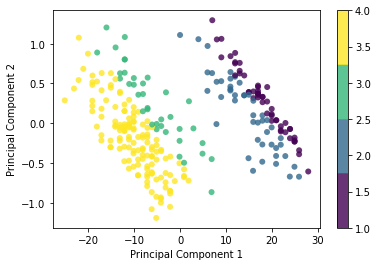

In [35]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 4))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
# comment 
# we have two PCs
# Shape of X: (272, 2)
# Shape of transformed X: (272, 2)

In [36]:
np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()


In [37]:
X=faithful.iloc[:, 1:3]
X=X-X.mean(axis=0)
X=X.values
print("X.values after subtracting the mean from it \n",X)
print("type(X) is",type(X))
print("X.shape ",X.shape)
print("y values \n",y)
print("type(y) is",type(y))
print("y.shape ",y.shape)

X.values after subtracting the mean from it 
 [[ 1.12216912e-01  8.10294118e+00]
 [-1.68778309e+00 -1.68970588e+01]
 [-1.54783088e-01  3.10294118e+00]
 [-1.20478309e+00 -8.89705882e+00]
 [ 1.04521691e+00  1.41029412e+01]
 [-6.04783088e-01 -1.58970588e+01]
 [ 1.21221691e+00  1.71029412e+01]
 [ 1.12216912e-01  1.41029412e+01]
 [-1.53778309e+00 -1.98970588e+01]
 [ 8.62216912e-01  1.41029412e+01]
 [-1.65478309e+00 -1.68970588e+01]
 [ 4.29216912e-01  1.31029412e+01]
 [ 7.12216912e-01  7.10294118e+00]
 [-1.73778309e+00 -2.38970588e+01]
 [ 1.21221691e+00  1.21029412e+01]
 [-1.32078309e+00 -1.88970588e+01]
 [-1.73778309e+00 -8.89705882e+00]
 [ 1.31221691e+00  1.31029412e+01]
 [-1.88778309e+00 -1.88970588e+01]
 [ 7.62216912e-01  8.10294118e+00]
 [-1.68778309e+00 -1.98970588e+01]
 [-1.73778309e+00 -2.38970588e+01]
 [-3.77830882e-02  7.10294118e+00]
 [-4.20783088e-01 -1.89705882e+00]
 [ 1.04521691e+00  3.10294118e+00]
 [ 1.12216912e-01  1.21029412e+01]
 [-1.52078309e+00 -1.58970588e+01]
 [ 5.9521

number of clusters K=  4


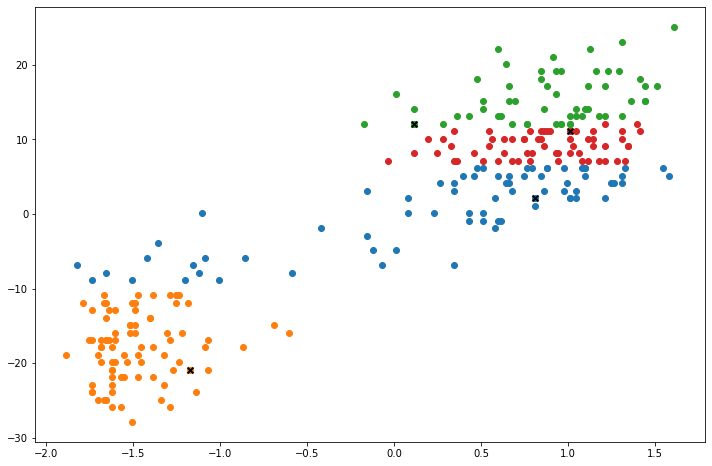

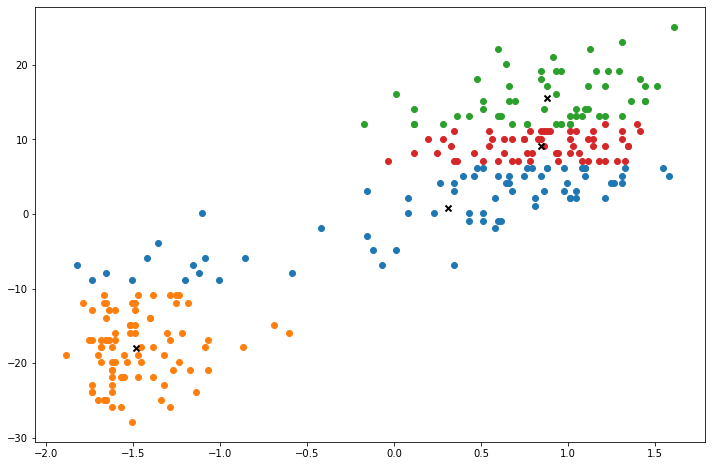

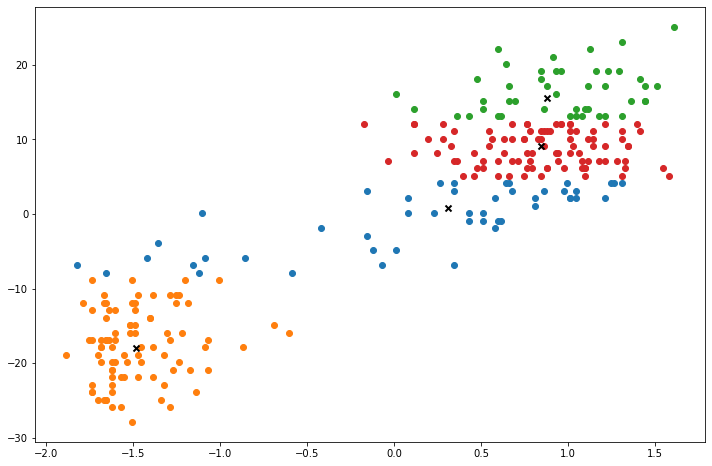

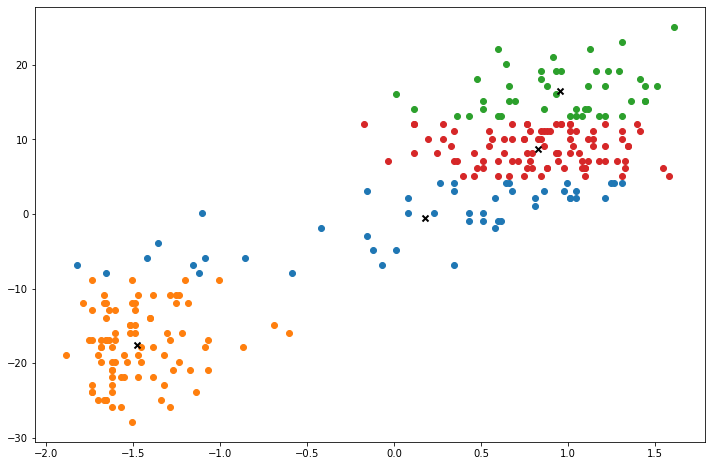

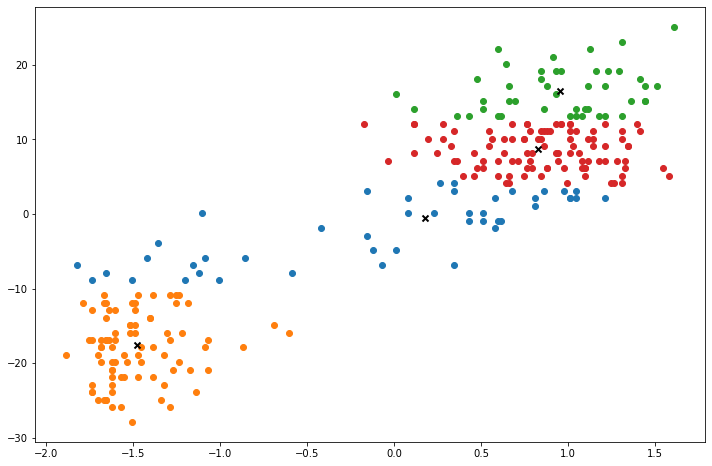

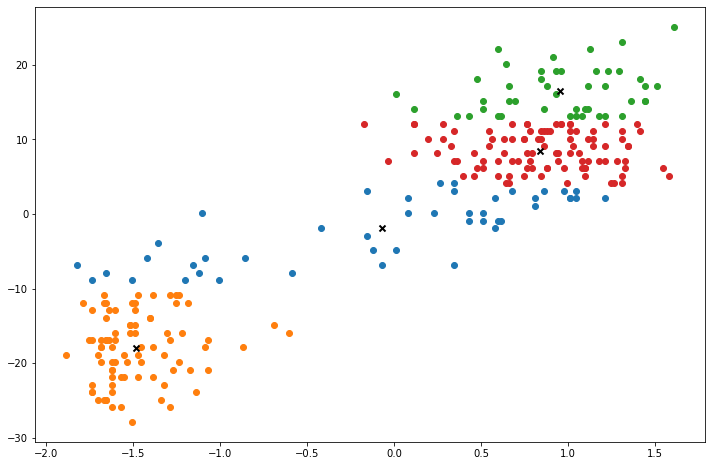

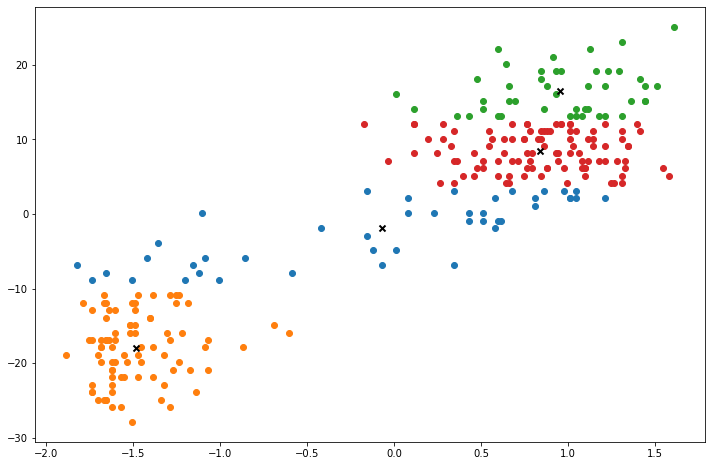

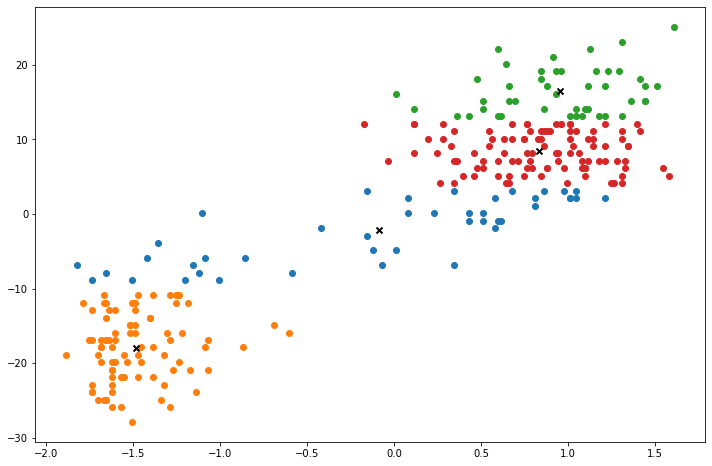

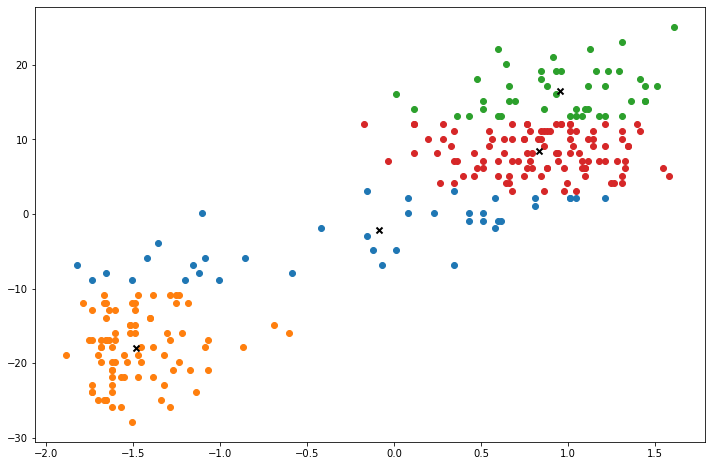

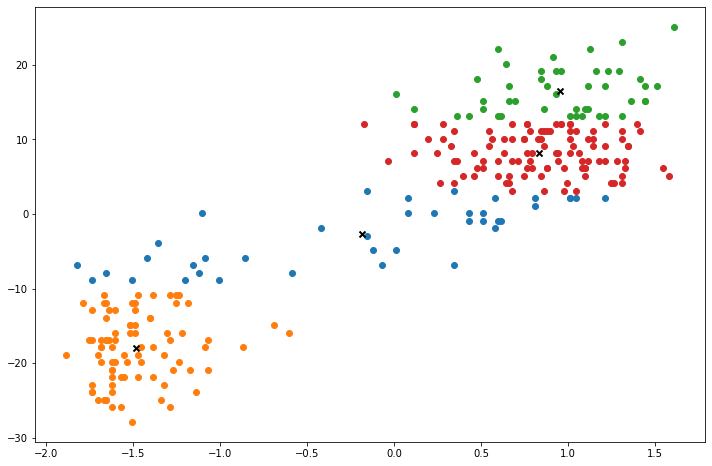

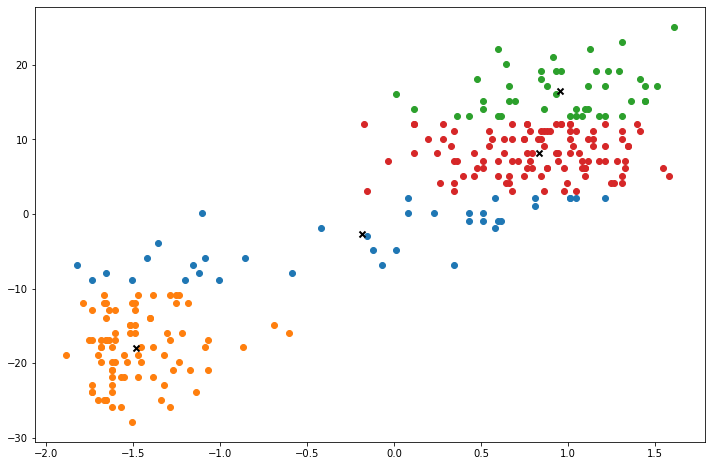

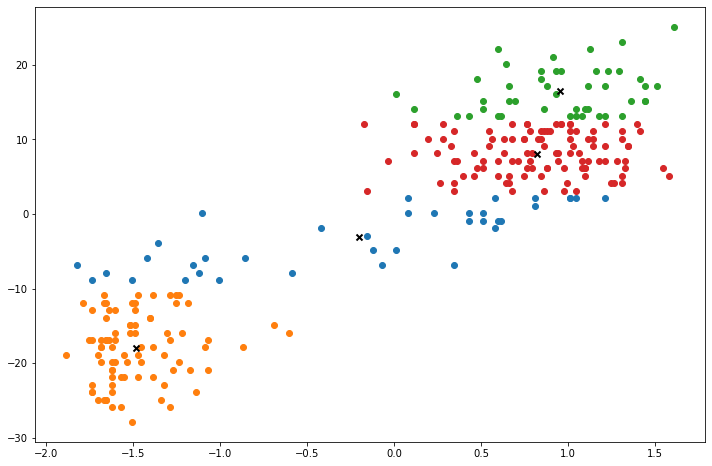

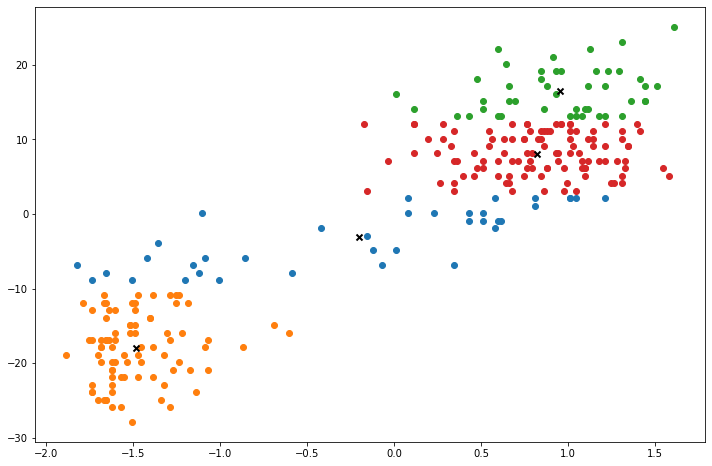

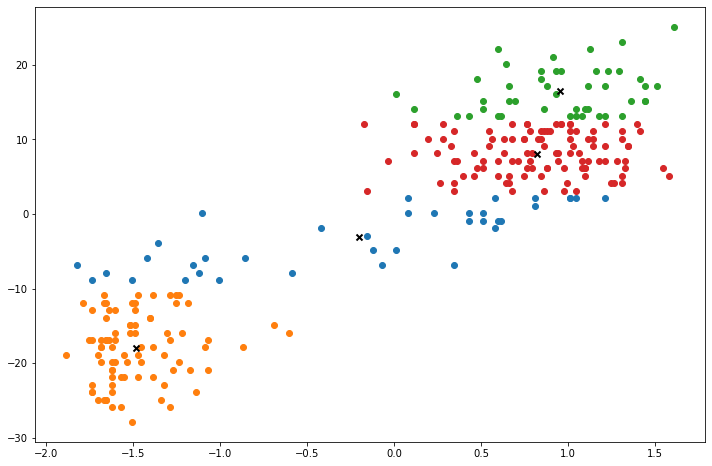

In [38]:
clusters = len(np.unique(y))
print("number of clusters K= ",clusters)
k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()